# Random Forests algorithm for classification and regression

In [1]:
import logging

# Set up logging
logging.basicConfig(filename='Random-forest.log', level=logging.INFO,
                    format="%(asctime)s:%(levelname)s:%(message)s", filemode='w')



In [2]:
%matplotlib inline
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

logging.info('Import neccessary libraries')

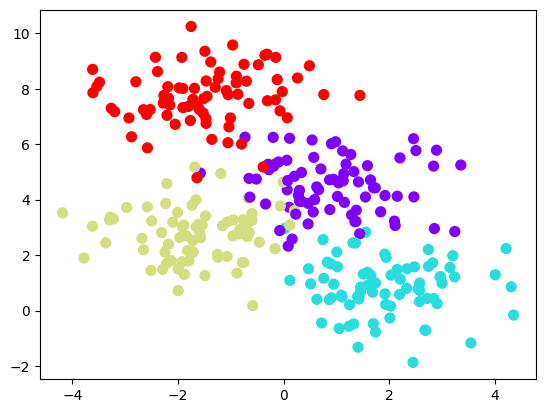

In [3]:
# Import necessary libraries
from sklearn.datasets import make_blobs  # For generating synthetic clustered data
import matplotlib.pyplot as plt  # For visualization

# Generate synthetic dataset using make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

# Create a scatter plot of the generated data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Display the plot
plt.show()

logging.info('generate synthetic data and plot generated data points')

In [12]:
# Display the first few rows of the data
print(X[:5])


[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]]


In [13]:
# check the shape of the data
print(X.shape)

(300, 2)


In [16]:
import pandas as pd
import numpy as np

# check missing values
print(np.isnan(X).sum())

0


## Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's `BaggingClassifier` meta-estimator, as shown here (see the following figure):

In [4]:
logging.info('Initialize and fit the model')

In [5]:
from sklearn.ensemble import RandomForestClassifier  # Importing the classifier

# Initialize the Random Forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the data
rf_model.fit(X, y)

RandomForestClassifier(random_state=0)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the training data
y_pred = rf_model.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

logging.info('Evaluation Matrics')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [7]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

logging.info('classification report')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



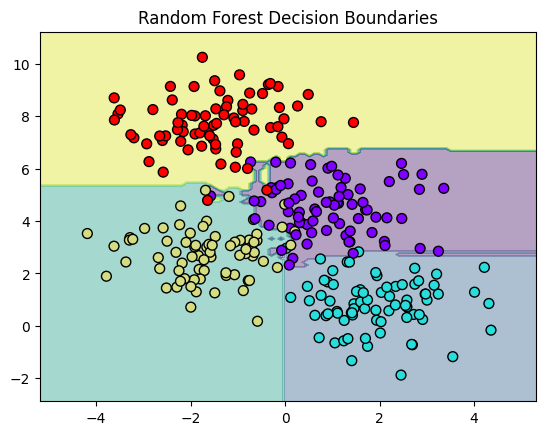

In [8]:
# Visualize the classifier's decision boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid for all the points in the data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained model to classify all the points in the meshgrid
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with the results
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='rainbow')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest Decision Boundaries')
plt.show()

logging.info('visualize decision boundaries')


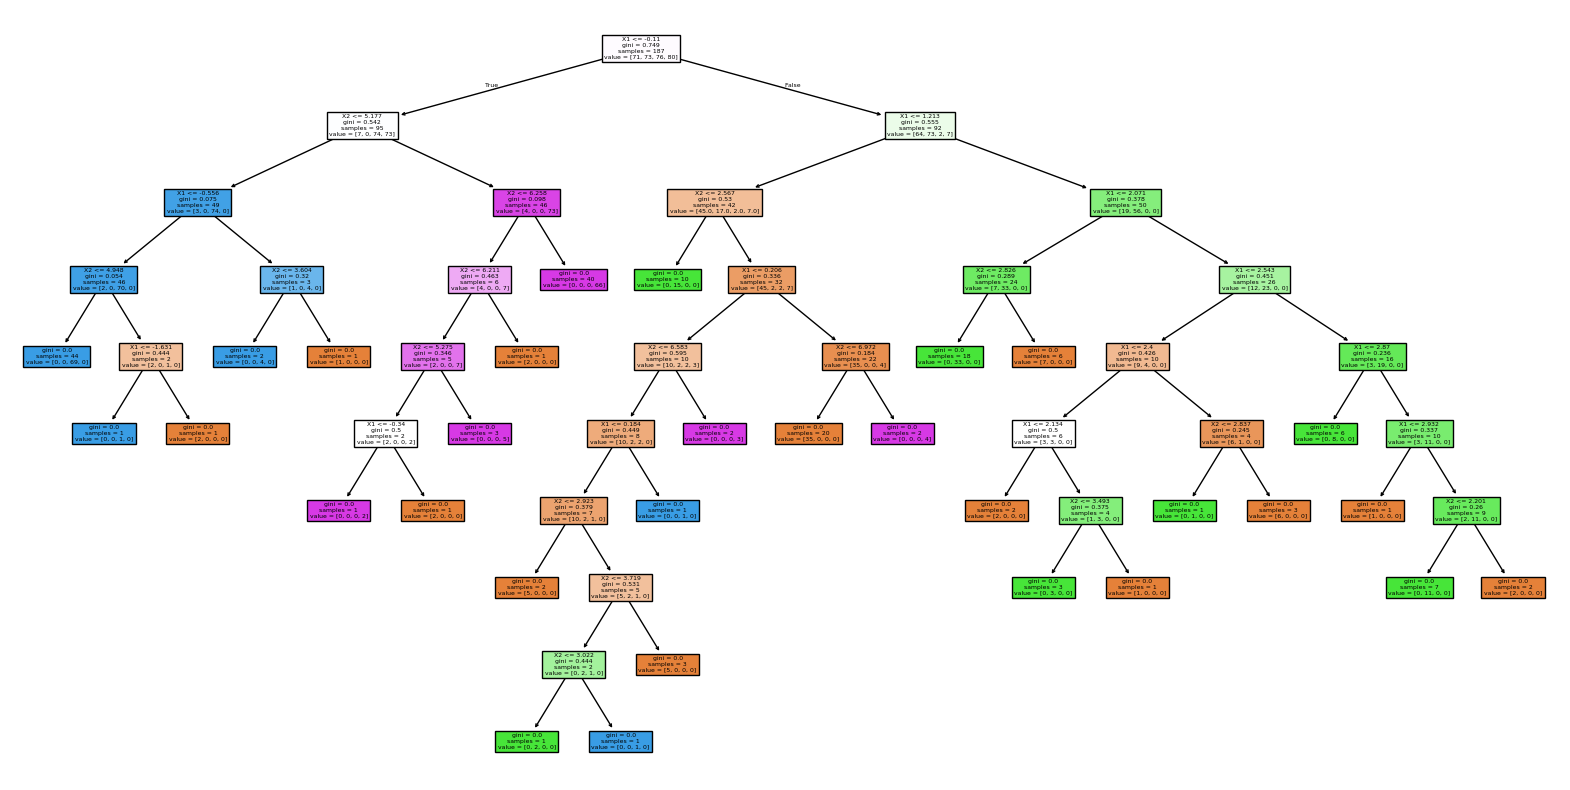

In [9]:
# Visualize random forest model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=['X1', 'X2'])
plt.show()

logging.info('visualize the random forest model')

## Random Forest Regression

Random forests have the ability to perform regression analysis on continuous variables. The appropriate estimator for this task is `RandomForestRegressor` and its implementation mirrors the previous syntax.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

logging.info('libraries importing for randomforest regressor')

In [11]:
# Initialize the Random Forest Regressor model with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

logging.info('initialize the random forest model')

In [12]:
# Fit the model to the data
rf_regressor.fit(X, y)

logging.info('Fit the random forest model')

In [14]:
# Predict the values for the training data
y_pred_reg = rf_regressor.predict(X)


In [15]:
# Calculate evaluation metrics

mse = mean_squared_error(y, y_pred_reg)
r2 = r2_score(y, y_pred_reg)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

logging.info('evaluation matrices')

Mean Squared Error: 0.04
R^2 Score: 0.97


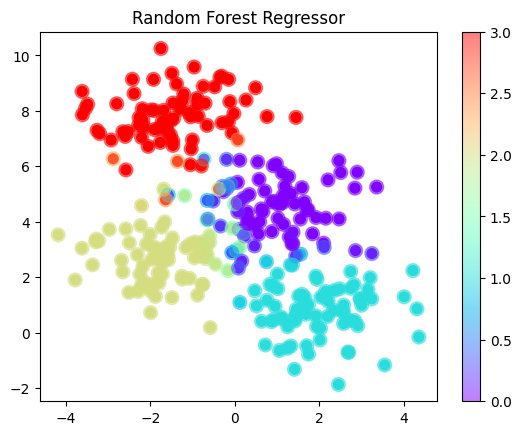

In [16]:
# Visualize the regression model
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.scatter(X[:, 0], X[:, 1], c=y_pred_reg, s=100, cmap='rainbow', alpha=0.5)
plt.colorbar()
plt.title('Random Forest Regressor')
plt.show()

logging.info('visualize regression model')

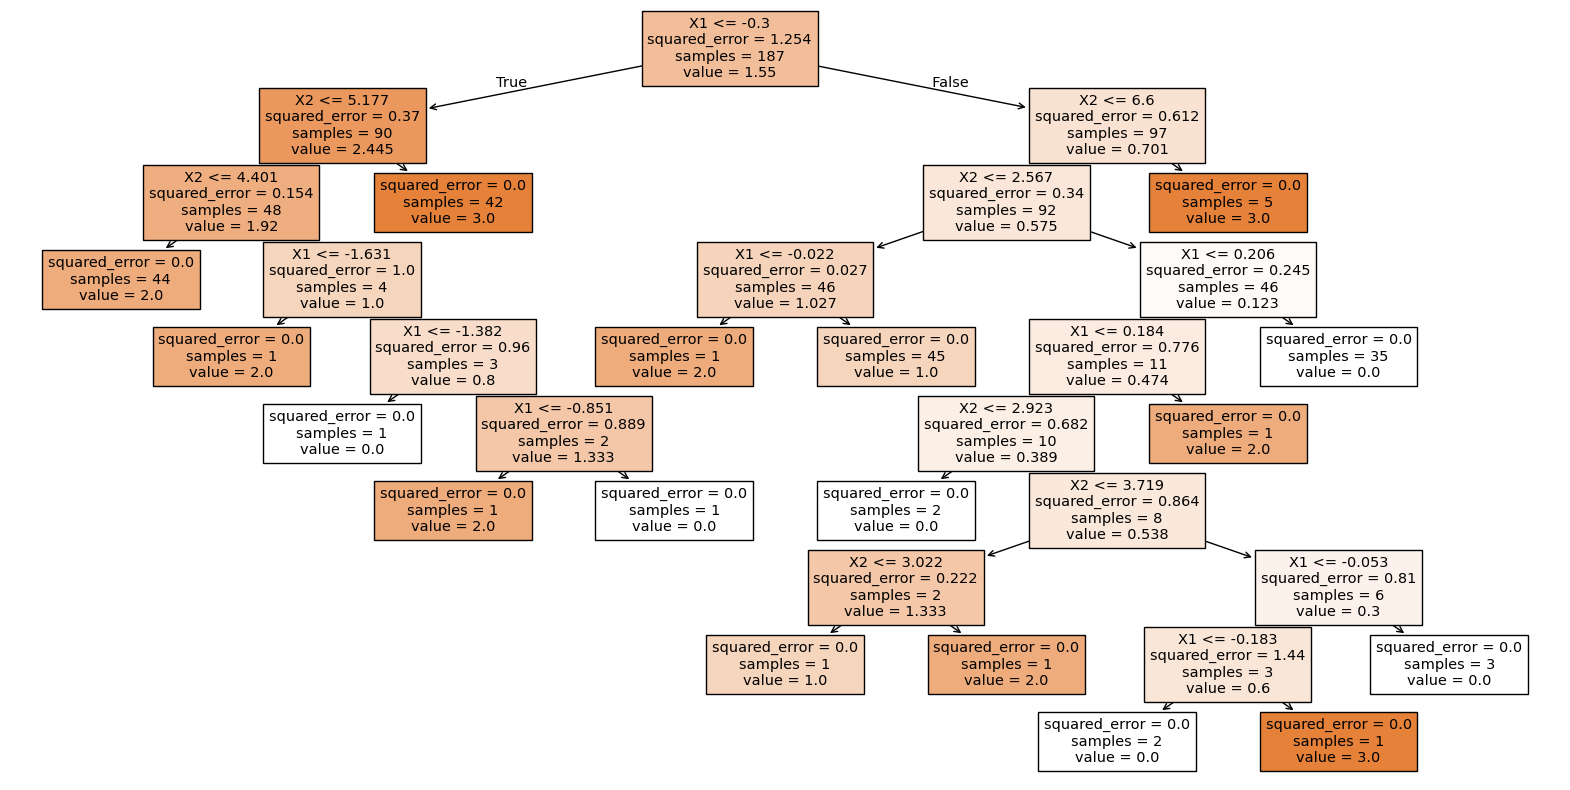

In [18]:
# Visualize random forest model
plt.figure(figsize=(20, 10))
plot_tree(rf_regressor.estimators_[0], filled=True, feature_names=['X1', 'X2'])
plt.show()

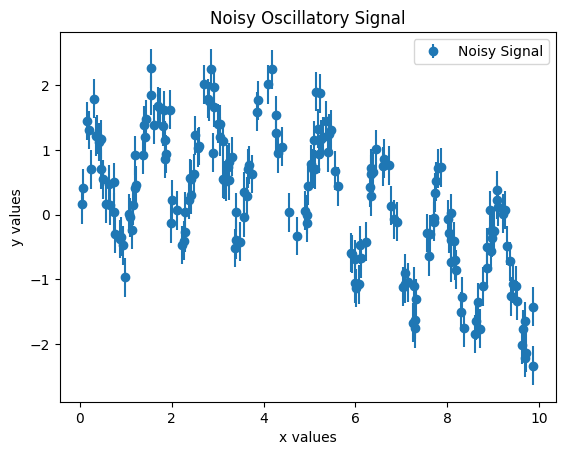

In [19]:
# Set a random seed for reproducibility
rng = np.random.RandomState(42)

# Generate 200 random values between 0 and 10
x = 10 * rng.rand(200)

# Define a function to model a signal with noise
def model(x, sigma=0.3):
    """
    Generates a synthetic signal with two oscillation components and noise.
    
    Parameters:
    x (array-like): Input data points.
    sigma (float): Standard deviation of the added noise.
    
    Returns:
    array-like: Generated signal values.
    """
    fast_oscillation = np.sin(5 * x)  # High-frequency oscillation component
    slow_oscillation = np.sin(0.5 * x)  # Low-frequency oscillation component
    noise = sigma * rng.randn(len(x))  # Random Gaussian noise

    return slow_oscillation + fast_oscillation + noise  # Combined signal

# Generate target values (y) using the model function
y = model(x)

# Plot the data with error bars
plt.errorbar(x, y, 0.3, fmt='o', label="Noisy Signal")  # 'o' for scatter points, 0.3 as error bar size
plt.xlabel("x values")  # Label for x-axis
plt.ylabel("y values")  # Label for y-axis
plt.title("Noisy Oscillatory Signal")  # Title for the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

find the best-fit curve for the following data points:


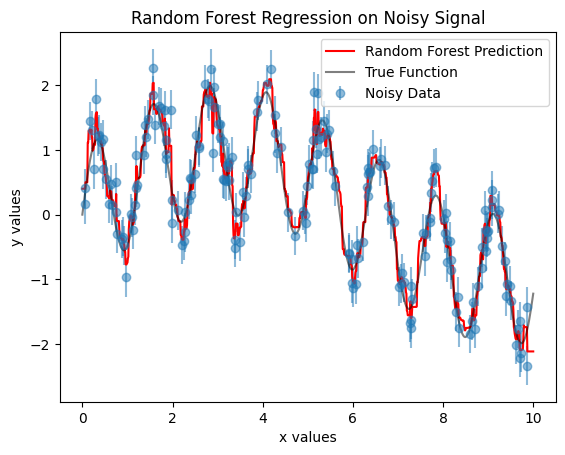

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Set up the Random Forest Regressor with 200 trees
forest = RandomForestRegressor(n_estimators=200, random_state=42)  # Using 200 decision trees for regression

# Train the model using the noisy data (x, y)
forest.fit(x[:, None], y)  # Reshape x to 2D as required by scikit-learn

# Generate a smooth range of x values for prediction
xfit = np.linspace(0, 10, 1000)  # Creates 1000 points between 0 and 10

# Predict y values using the trained Random Forest model
yfit = forest.predict(xfit[:, None])  # Reshape xfit to 2D for prediction

# Generate the true function values (without noise) for comparison
ytrue = model(xfit, sigma=0)  # Compute the original signal without noise

# Plot the original noisy data points with error bars
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5, label="Noisy Data")  
# 'o' for scatter points, 0.3 for error bars, alpha=0.5 for transparency

# Plot the Random Forest model's prediction in red
plt.plot(xfit, yfit, '-r', label="Random Forest Prediction")

# Plot the true function in black with slight transparency
plt.plot(xfit, ytrue, '-k', alpha=0.5, label="True Function")

# Add labels and legend
plt.xlabel("x values")  # Label for x-axis
plt.ylabel("y values")  # Label for y-axis
plt.title("Random Forest Regression on Noisy Signal")  # Title for the plot
plt.legend()  # Show legend

# Display the plot
plt.show()

logging.info('finding the best fit curve')

## Summary

In this section, we have covered random forests, a powerful ensemble method that can be used for classification or regression.
Random forests are a type of ensemble learner that use bagging to create a collection of decision trees with controlled variance.
The key parameters of random forests are `n_estimators` and `max_features`, which control the number of estimators in the forest and the subset of features considered for each split, respectively.
Random forests are among the most powerful and widely used models for regression and classification.
